In [3]:
import requests
import json
import numpy as np
import pandas as pd
import nltk 
import matplotlib
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from string import punctuation
import re
import numpy as np
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from rake_nltk import Rake 

In [4]:
news_articles_df = pd.read_csv("News.csv")
news_articles_df.head()

,ID,News Category,Title,Summary
0,N88753,lifestyle,"The Brands Queen Elizabeth, Prince Charles, an...","Shop the notebooks, jackets, and more that the..."
1,N45436,news,Walmart Slashes Prices on Last-Generation iPads,Apple's new iPad releases bring big deals on l...
2,N23144,health,50 Worst Habits For Belly Fat,These seemingly harmless habits are holding yo...
3,N86255,health,Dispose of unwanted prescription drugs during ...,NaN
4,N93187,news,The Cost of Trump's Aid Freeze in the Trenches...,Lt. Ivan Molchanets peeked over a parapet of s...


### Data Cleaning and Preprocessing

In [5]:
# droping the rows with missing data 
news_articles_df.dropna(inplace=True)

In [6]:
# summarizing the number of rows and columns in the dataset
print(news_articles_df.isnull().sum())
print(news_articles_df.shape)

ID               0
News Category    0
Title            0
Summary          0
dtype: int64
(96112, 4)


In [7]:
# combining the title and the Summary to get one dataframe column 'News'
news_articles_df['News'] = news_articles_df['Title'].map(str) +" "+ news_articles_df['Summary'].map(str) 
news_articles_df.head()

,ID,News Category,Title,Summary,News
0,N88753,lifestyle,"The Brands Queen Elizabeth, Prince Charles, an...","Shop the notebooks, jackets, and more that the...","The Brands Queen Elizabeth, Prince Charles, an..."
1,N45436,news,Walmart Slashes Prices on Last-Generation iPads,Apple's new iPad releases bring big deals on l...,Walmart Slashes Prices on Last-Generation iPad...
2,N23144,health,50 Worst Habits For Belly Fat,These seemingly harmless habits are holding yo...,50 Worst Habits For Belly Fat These seemingly ...
4,N93187,news,The Cost of Trump's Aid Freeze in the Trenches...,Lt. Ivan Molchanets peeked over a parapet of s...,The Cost of Trump's Aid Freeze in the Trenches...
5,N75236,health,I Was An NBA Wife. Here's How It Affected My M...,"I felt like I was a fraud, and being an NBA wi...",I Was An NBA Wife. Here's How It Affected My M...


In [9]:
# Function to remove non-ascii characters from the text
def _removeNonAscii(s): 
    return "".join(i for i in s if ord(i)<128)
# function to remove the punctuations, apostrophe, special characters using regular expressions
def clean_text(text):
    text = text.lower()
    text = re.sub(r"what's", "what is ", text)
    text = text.replace('(ap)', '')
    text = re.sub(r"\'s", " is ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "cannot ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r'\W+', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r"\\", "", text)
    text = re.sub(r"\'", "", text)    
    text = re.sub(r"\"", "", text)
    text = re.sub('[^a-zA-Z ?!]+', '', text)
    text = _removeNonAscii(text)
    text = text.strip()
    return text
# function to remo9ve stopwords
def remove_stopwords(word_tokens):
    filtered_sentence = [] 
    stop_words = stopwords.words('english')
    specific_words_list = ['char', 'u', 'hindustan', 'doj', 'washington'] 
    stop_words.extend(specific_words_list )
    for w in word_tokens: 
        if w not in stop_words: 
            filtered_sentence.append(w) 
    return filtered_sentence
# function for lemmatization 
def lemmatize(x):
    lemmatizer = WordNetLemmatizer()
    return' '.join([lemmatizer.lemmatize(word) for word in x])

In [10]:
# splitting a string, text into a list of tokens
tokenizer = RegexpTokenizer(r'\w+')
def tokenize(x): 
    return tokenizer.tokenize(x)

In [17]:
# applying all of these functions to the our dataframe 
news_articles_df['News'] = news_articles_df['News'].map(clean_text)
news_articles_df['tokens'] = news_articles_df['News'].map(tokenize)
news_articles_df['tokens'] = news_articles_df['tokens'].map(remove_stopwords)
news_articles_df['lems'] =news_articles_df['tokens'].map(lemmatize)

In [18]:
news_articles_df.head()

,ID,News Category,Title,Summary,News,tokens,lems
0,N88753,lifestyle,"The Brands Queen Elizabeth, Prince Charles, an...","Shop the notebooks, jackets, and more that the...",the brands queen elizabeth prince charles and ...,"[brands, queen, elizabeth, prince, charles, pr...",brand queen elizabeth prince charles prince ph...
1,N45436,news,Walmart Slashes Prices on Last-Generation iPads,Apple's new iPad releases bring big deals on l...,walmart slashes prices on last generation ipad...,"[walmart, slashes, prices, last, generation, i...",walmart slash price last generation ipads appl...
2,N23144,health,50 Worst Habits For Belly Fat,These seemingly harmless habits are holding yo...,worst habits for belly fat these seemingly har...,"[worst, habits, belly, fat, seemingly, harmles...",worst habit belly fat seemingly harmless habit...
4,N93187,news,The Cost of Trump's Aid Freeze in the Trenches...,Lt. Ivan Molchanets peeked over a parapet of s...,the cost of trump is aid freeze in the trenche...,"[cost, trump, aid, freeze, trenches, ukraine, ...",cost trump aid freeze trench ukraine war lt iv...
5,N75236,health,I Was An NBA Wife. Here's How It Affected My M...,"I felt like I was a fraud, and being an NBA wi...",i was an nba wife here is how it affected my m...,"[nba, wife, affected, mental, health, felt, li...",nba wife affected mental health felt like frau...


In [21]:
# finding the keywords using the rake algorithm from NLTK
news_articles_df['keywords'] = ""
for index,row in news_articles_df.iterrows():
    comb_text = row['News']
    r = Rake()
    r.extract_keywords_from_text(comb_text)
    key_words_dict = r.get_word_degrees()
    row['keywords'] = list(key_words_dict.keys())

In [22]:
# applying the fucntion to the dataframe
news_articles_df['keywords'] = news_articles_df['keywords'].map(remove_stopwords)
news_articles_df['lems'] =news_articles_df['keywords'].map(lemmatize)

In [23]:
news_articles_df.head()

,ID,News Category,Title,Summary,News,tokens,lems,keywords
0,N88753,lifestyle,"The Brands Queen Elizabeth, Prince Charles, an...","Shop the notebooks, jackets, and more that the...",the brands queen elizabeth prince charles and ...,"[brands, queen, elizabeth, prince, charles, pr...",brand queen elizabeth prince charles philip sw...,"[brands, queen, elizabeth, prince, charles, ph..."
1,N45436,news,Walmart Slashes Prices on Last-Generation iPads,Apple's new iPad releases bring big deals on l...,walmart slashes prices on last generation ipad...,"[walmart, slashes, prices, last, generation, i...",walmart slash price last generation ipads appl...,"[walmart, slashes, prices, last, generation, i..."
2,N23144,health,50 Worst Habits For Belly Fat,These seemingly harmless habits are holding yo...,worst habits for belly fat these seemingly har...,"[worst, habits, belly, fat, seemingly, harmles...",worst habit belly fat seemingly harmless holdi...,"[worst, habits, belly, fat, seemingly, harmles..."
4,N93187,news,The Cost of Trump's Aid Freeze in the Trenches...,Lt. Ivan Molchanets peeked over a parapet of s...,the cost of trump is aid freeze in the trenche...,"[cost, trump, aid, freeze, trenches, ukraine, ...",cost trump aid freeze trench ukraine war lt iv...,"[cost, trump, aid, freeze, trenches, ukraine, ..."
5,N75236,health,I Was An NBA Wife. Here's How It Affected My M...,"I felt like I was a fraud, and being an NBA wi...",i was an nba wife here is how it affected my m...,"[nba, wife, affected, mental, health, felt, li...",nba wife affected mental health felt like frau...,"[nba, wife, affected, mental, health, felt, li..."


In [24]:
print(news_articles_df.isnull().sum())
news_articles_df.dropna(inplace=True)
print(news_articles_df.shape)

ID               0
News Category    0
Title            0
Summary          0
News             0
tokens           0
lems             0
keywords         0
dtype: int64
(96112, 8)


### Conducting Sentiment Analysis to understand distribution of Sentiments in the News Data

In [27]:
# calculating the polarity of the news articles 
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
sia = SIA()
results = []
for line in news_articles_df['lems'] :
    pol_score = sia.polarity_scores(line)
    pol_score['headline'] = line
    results.append(pol_score)

In [29]:
# Creating a new dataframe named headlines_polarity of only the polarity score, News Category and headline
headlines_polarity = pd.DataFrame.from_records(results)
temp = []
for line in news_articles_df['News Category'] :
    temp.append(line)
headlines_polarity['News Category'] =temp

In [30]:
# categorize news as positive or negative based on the compound score obtained
headlines_polarity['label'] = 0
# I have considered the news as positive if the compound score is greater than 0.2 hence the label 1
headlines_polarity.loc[headlines_polarity['compound'] > 0.2, 'label'] = 1
# if the compound score is below 0.2 then it is considered negative 
headlines_polarity.loc[headlines_polarity['compound'] < -0.2, 'label'] = -1
# word count of news headlines is calculated
headlines_polarity['word_count'] = headlines_polarity['headline'].apply(lambda x: len(str(x).split()))

In [31]:
headlines_polarity.head()

,neg,neu,pos,compound,headline,News Category,label,word_count
0,0.085,0.915,0.000,-0.0516,brand queen elizabeth prince charles philip sw...,lifestyle,0,14
1,0.130,0.870,0.000,-0.2732,walmart slash price last generation ipads appl...,news,-1,15
2,0.317,0.423,0.259,-0.2732,worst habit belly fat seemingly harmless holdi...,health,-1,12
3,0.229,0.731,0.040,-0.6908,cost trump aid freeze trench ukraine war lt iv...,news,-1,26
4,0.413,0.337,0.250,-0.5267,nba wife affected mental health felt like frau...,health,-1,12


In [32]:
# Grouping the news articles by their category and calculating their mean polarity  
headlines_polarity.groupby('News Category')['compound'].mean().reset_index().to_csv('mean_polarity.csv', index=False)

### Data Visualisation

In [35]:
# libraries
import pandas as pd
import numpy as np
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import warnings 
warnings.filterwarnings('ignore')
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10.0, 6.0)
import plotly.graph_objs as go
from wordcloud import WordCloud
import matplotlib.pyplot as plt


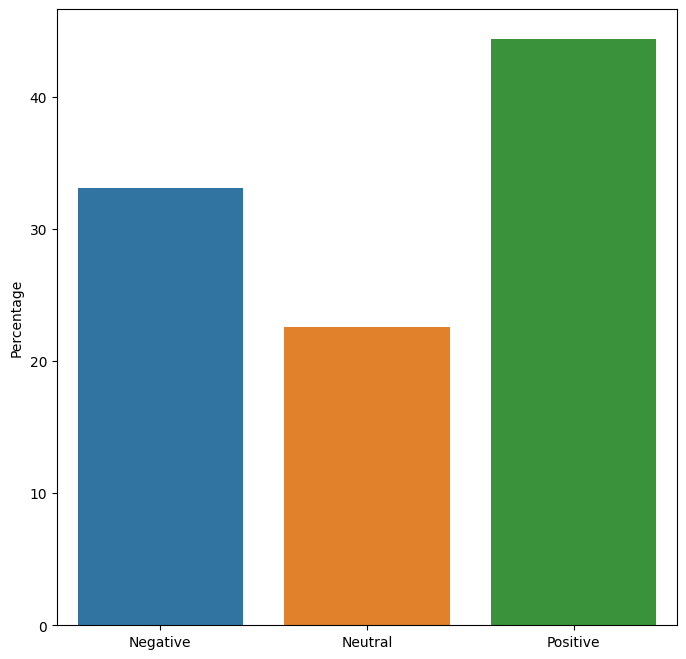

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize=(8, 8))
counts = headlines_polarity.label.value_counts(normalize=True) * 100
sns.barplot(x=counts.index, y=counts, ax=ax)
ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])
ax.set_ylabel("Percentage")
plt.show()

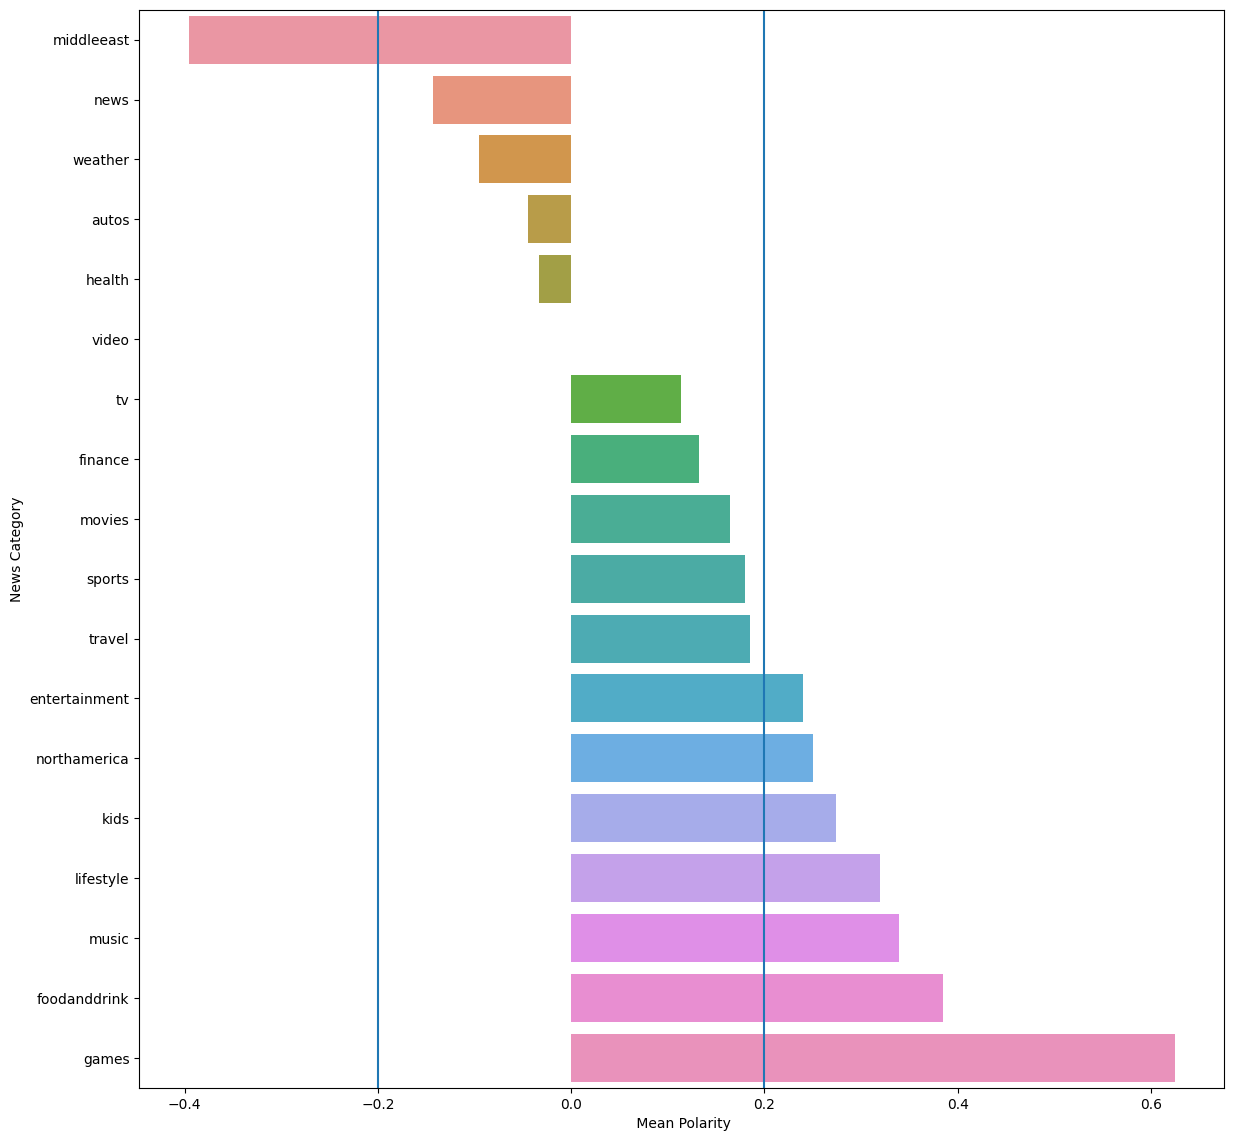

In [37]:
# Checking out the distribution of the news polarity based on the source of news
df_polarity = pd.read_csv('mean_polarity.csv')
df_polarity = df_polarity.sort_values(['compound']).reset_index(drop=True)
fig, ax = plt.subplots(figsize=(14, 14))
ax = sns.barplot(x='compound', y='News Category', data=df_polarity)
ax.set_xlabel(' Mean Polarity')
ax.axvline(0.2)
ax.axvline(-0.2)

In [38]:
from nltk.tokenize import word_tokenize, RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
stop_words = stopwords.words('english')
print(type(stop_words))
specific_words_list = ['char', 'u', 'hindustan', 'doj', 'washington'] 
#stop_words.extend(specific_words_list )
def process_text(headlines):
    tokens = []
    for line in headlines:
        line = line.lower()
        toks = tokenizer.tokenize(line)
        toks = [t for t in toks if t not in stop_words]
        tokens.extend(toks)  
    return tokens

<class 'list'>


In [39]:
# Positive headlines and its distribution 
pos_lines = list(headlines_polarity[headlines_polarity.label == 1].headline)
# extract the headlines that had label =1 which meant it had a positive overall sentiment
pos_tokens =process_text(pos_lines)
pos_freq = nltk.FreqDist(pos_tokens)

# Now negative headlines
neg_lines = list(headlines_polarity[headlines_polarity.label == -1].headline)
# extract the headlines that had label-1 which meant it had a negative overall sentiment
neg_tokens = process_text(neg_lines)
neg_freq = nltk.FreqDist(neg_tokens)

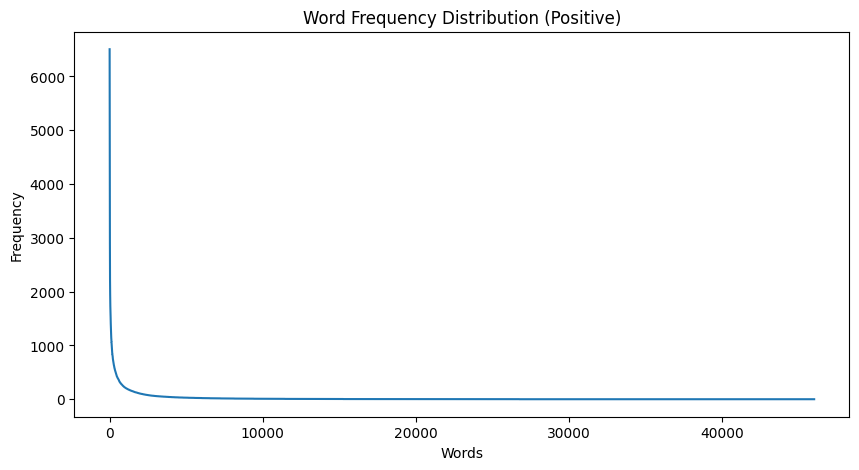

In [40]:
# plotting the word distribution for positive headlines
y_val = [x[1] for x in pos_freq.most_common()]
fig = plt.figure(figsize=(10,5))
plt.plot(y_val)
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Word Frequency Distribution (Positive)")
plt.show()

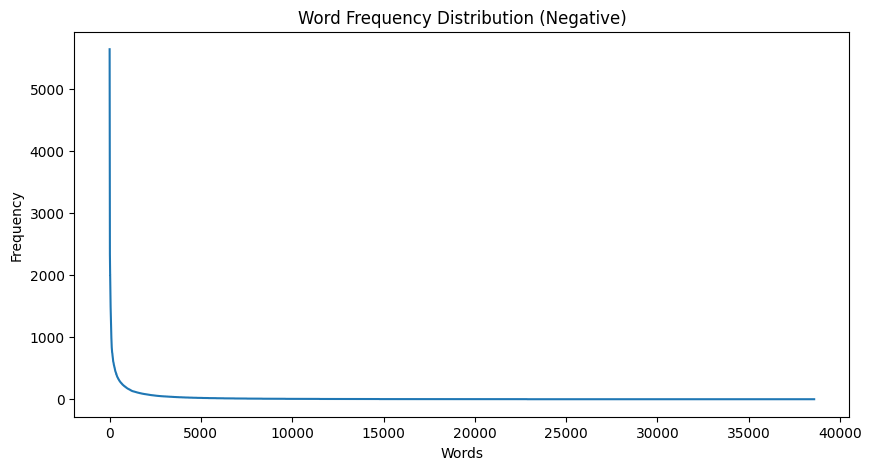

In [41]:
# Plotting the word frequency distribution for negative headlines
y_val = [x[1] for x in neg_freq.most_common()]
fig = plt.figure(figsize=(10,5))
plt.plot(y_val)

plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Word Frequency Distribution (Negative)")
plt.show()

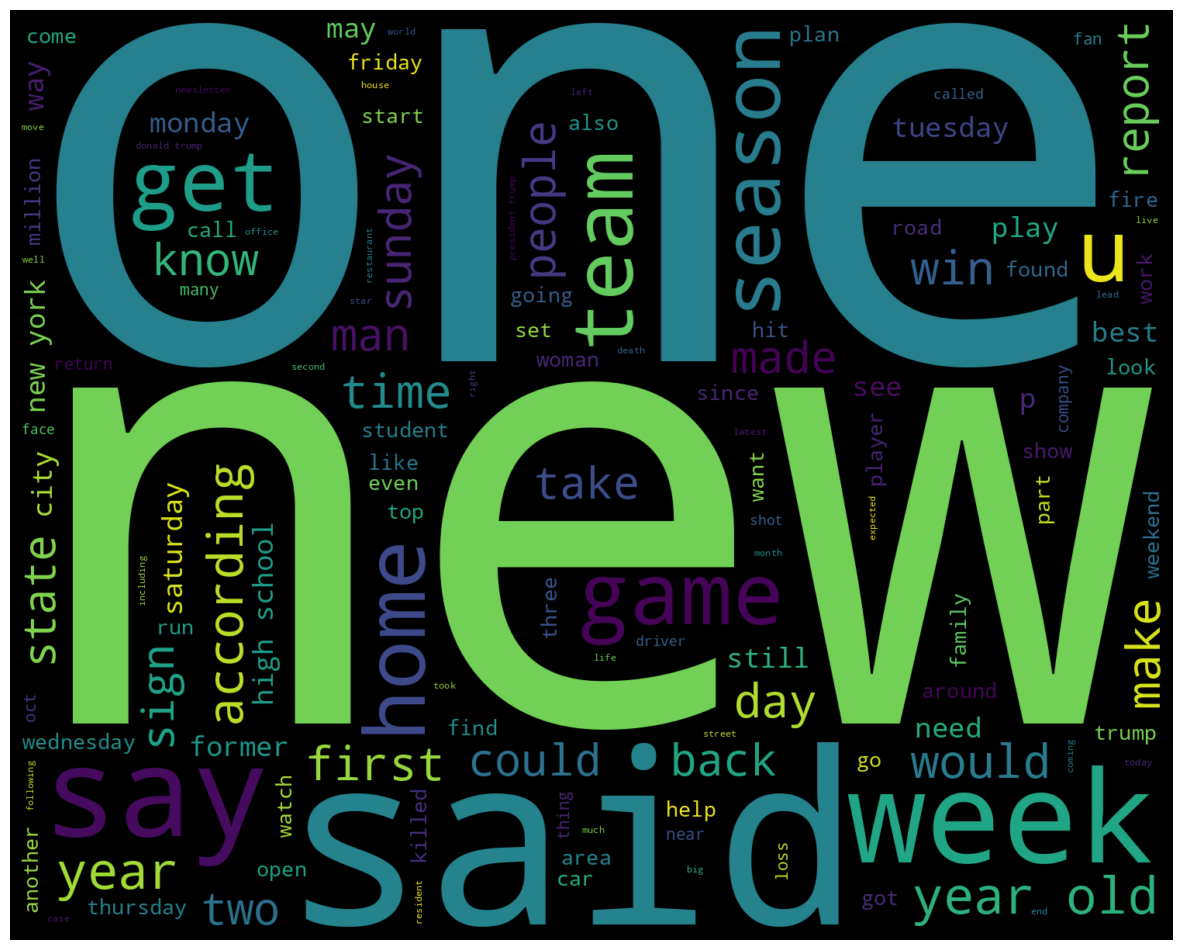

In [43]:
# Wordcloud to see whats dominating the news articles
data=news_articles_df
stop = ["https", "co", "char","chars"] + list(stop_words)
wc = WordCloud(stopwords=stop, max_words=700, margin=10, background_color='black',
scale=3, relative_scaling = 0.4, width=500, height=400,
random_state=1).generate(' '.join(data['News']))
plt.figure(figsize=(15,15))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

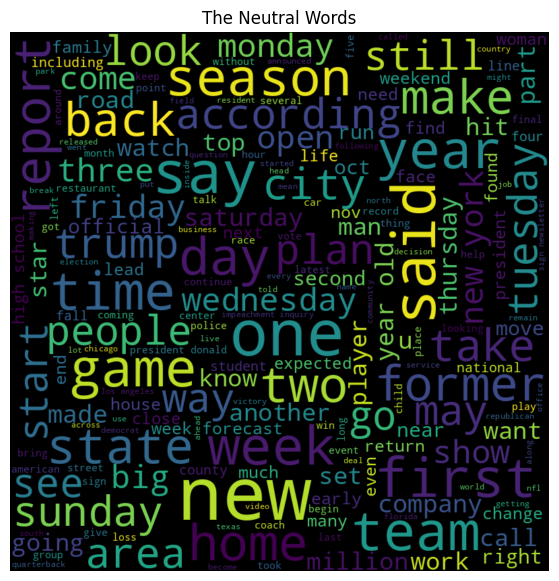

In [44]:
# Wordcloud for the Neutral Words in the news articles
neutral_words =' '.join([text for text in headlines_polarity['headline'][headlines_polarity['label'] == 0]])

wordcloud = WordCloud(width=800, height=800, random_state = 0, max_font_size = 110).generate(neutral_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Neutral Words')
plt.show()


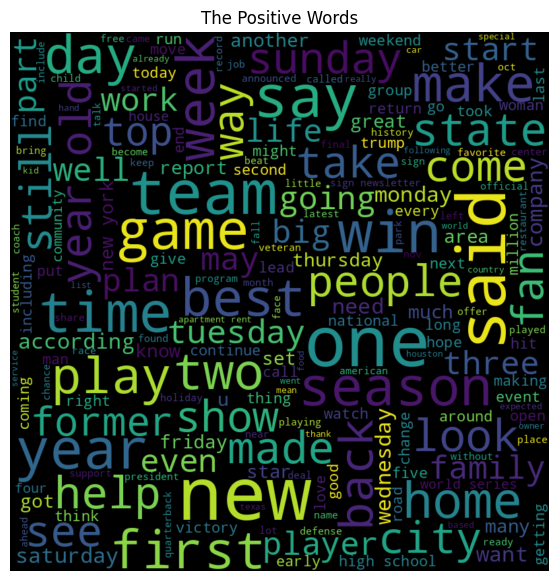

In [45]:
# Wordcloud for the Positive Words in the news articles
positive_words =' '.join([text for text in headlines_polarity['headline'][headlines_polarity['label'] == 1]])

wordcloud = WordCloud(width=800, height=800, random_state = 0, max_font_size = 110).generate(positive_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Positive Words')
plt.show()

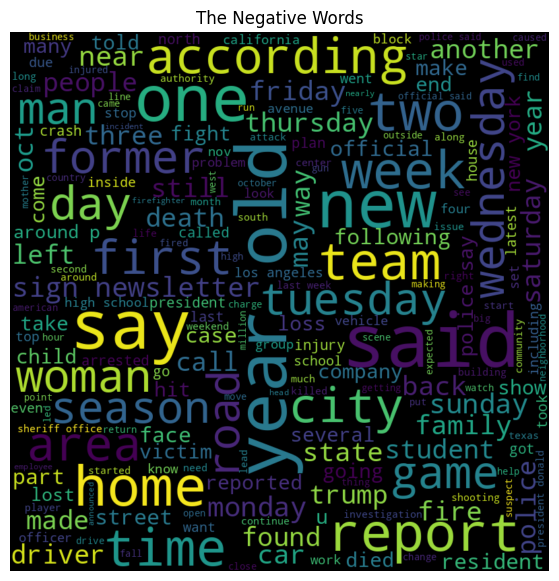

In [46]:
# Wordcloud for the Negative Words in the news articles
negative_words =' '.join([text for text in headlines_polarity['headline'][headlines_polarity['label'] == -1]])

wordcloud = WordCloud(width=800, height=800, random_state = 0, max_font_size = 110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Negative Words')
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=5763d189-b23d-4b47-b07c-ce4cccc5b6a6' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>